Dataset Loaded Successfully


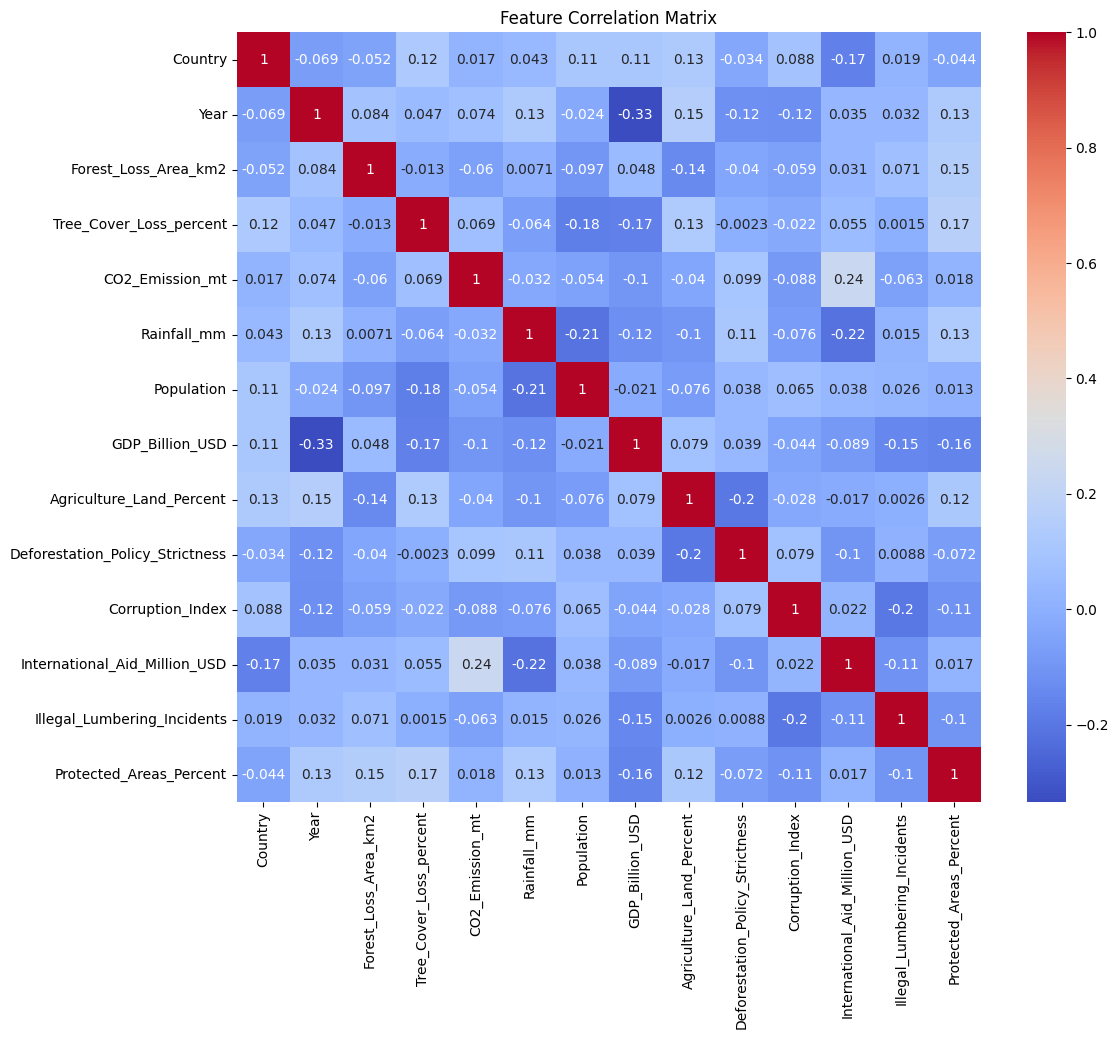

Data Splitting Completed


In [1]:
# Phase 1: Data Preprocessing

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer

# 2️⃣ Load the Data
df = pd.read_csv("deforestation_dataset.csv")
print("Dataset Loaded Successfully")

# 3️⃣ Handle Missing Values Properly

# Impute categorical columns
categorical_cols = ['Country']
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# Encode 'Country'
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])

# Impute numeric columns (excluding target variable if not needed)
numeric_cols = ['CO2_Emission_mt', 'Rainfall_mm', 'Population', 
                'GDP_Billion_USD', 'Agriculture_Land_Percent', 
                'International_Aid_Million_USD', 'Illegal_Lumbering_Incidents',
                'Protected_Areas_Percent', 'Corruption_Index', 
                'Deforestation_Policy_Strictness', 'Tree_Cover_Loss_percent', 'Forest_Loss_Area_km2']

imputer_num = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])

# 4️⃣ Feature Scaling

scaler = StandardScaler()
scale_cols = ['CO2_Emission_mt', 'Rainfall_mm', 'Population', 
              'GDP_Billion_USD', 'Agriculture_Land_Percent', 
              'International_Aid_Million_USD', 'Illegal_Lumbering_Incidents',
              'Protected_Areas_Percent']

df[scale_cols] = scaler.fit_transform(df[scale_cols])

# 5️⃣ Correlation Matrix (Optional)
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# 6️⃣ Split Data

target = 'Tree_Cover_Loss_percent'  # Or 'Forest_Loss_Area_km2'

X = df.drop(columns=['Tree_Cover_Loss_percent', 'Forest_Loss_Area_km2'])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    shuffle=True)

print("Data Splitting Completed")


Model Evaluation Metrics:
MAE: 2.2827590993757902
MSE: 6.379696674968309
RMSE: 2.525806143584323
R² Score: -0.3352262570315889


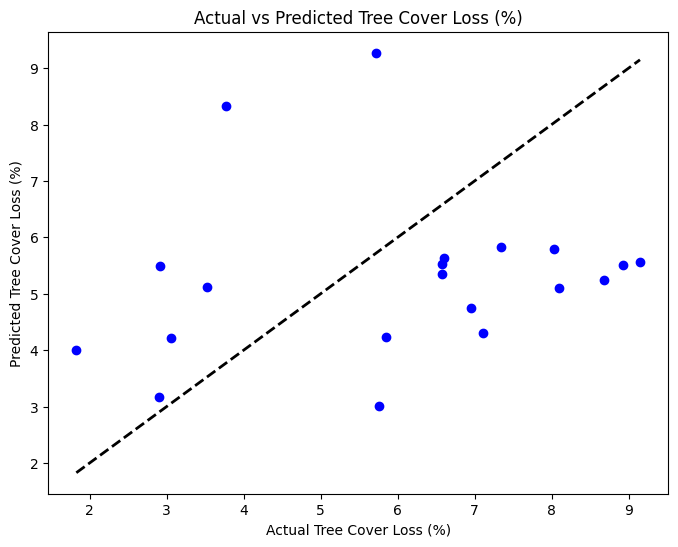

In [2]:
# Phase 2: Model Building and Evaluation

# 1️⃣ Train SVM Model (Linear Kernel First)

svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

# 2️⃣ Predict and Evaluate

y_pred = svm_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# 3️⃣ Visualize Actual vs Predicted

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Tree Cover Loss (%)")
plt.ylabel("Predicted Tree Cover Loss (%)")
plt.title("Actual vs Predicted Tree Cover Loss (%)")
plt.show()

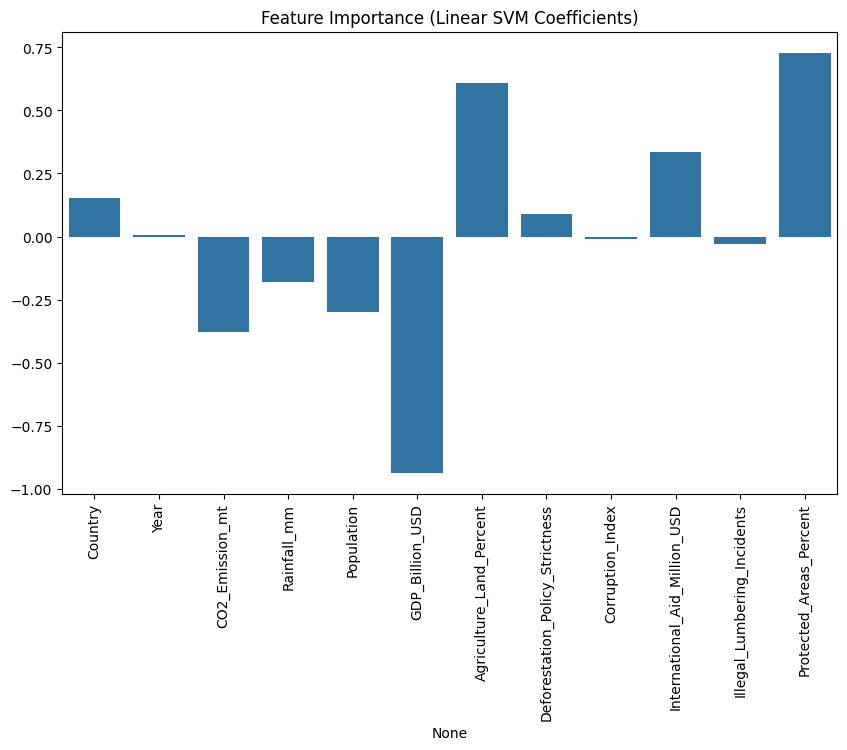

In [ ]:
# Phase 3: Feature Importance & Hyperparameter Tuning

# 1️⃣ Feature Importance (Linear SVM Only)

if svm_model.kernel == 'linear':
    importance = svm_model.coef_[0]
    plt.figure(figsize=(10,6))
    sns.barplot(x=X.columns, y=importance)
    plt.xticks(rotation=90)
    plt.title("Feature Importance (Linear SVM Coefficients)")
    plt.show()
else:
    # Use Permutation Importance for non-linear SVM
    result = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)
    sorted_idx = result.importances_mean.argsort()
    
    plt.figure(figsize=(10,6))
    plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
    plt.title("Feature Importance (Permutation Importance)")
    plt.show()

# 2️⃣ Hyperparameter Tuning (Optional)

params = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVR(), param_grid=params, cv=5, scoring='r2')
grid.fit(X_train, y_train)

print("\nBest Parameters from Grid Search:", grid.best_params_)
